In [8]:
import ImageRepresentation
from rsift_extraction import _GetSingleImageFeature
import numpy as np
import cv2 as cv
import os
from delf import feature_io
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import image as img
query_dir = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_query_delf/"
query_images_dir = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_query_full/"
database_dir = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_vlad256_delf/"
image_dir = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1/"
saved_model = "/home/canhld/workplace/Daejeon_street_view/datasets/codebook/delf_256_model.pkl"

In [9]:
ir = ImageRepresentation.ImageRepresentation(name = 'delf_vlad', saved_model = saved_model )
print(ir.codebook.cluster_centers_.shape)

(256, 40)


In [10]:
query_vectors = []
queries = []
query_images = []


# for f in os.listdir(query_dir):
#     filename, ext = f.split('.')
#     if ext == 'JPG' or ext == 'jpg':
#         queries.append(filename)
#         im = cv.imread(os.path.join(query_dir, f), flags=cv.IMREAD_UNCHANGED)
#         query_images.append(cv.cvtColor(im, cv.COLOR_RGB2BGR))
#         gray = cv.cvtColor(im, cv.COLOR_RGB2GRAY)
#         features = _GetSingleImageFeature(gray)[1]
#         bow_vector = ir.VLADEncode(features)
#         query_vectors.append(bow_vector)

for f in os.listdir(query_dir):
    filename, ext = f.split('.')
    if ext == 'DELF' or ext == 'delf':
        queries.append(filename)
        im = cv.imread(os.path.join(query_images_dir, filename + '.jpg'), flags=cv.IMREAD_UNCHANGED)
        query_images.append(cv.cvtColor(im, cv.COLOR_RGB2BGR))
        _,_,features,_,_ = feature_io.ReadFromFile(os.path.join(query_dir, f))
        vector = ir.VLADEncode(features)
        query_vectors.append(vector)

# for f in os.listdir(query_dir):
#     filename = f.split('.')[0]
#     queries.append(filename)
#     im = cv.imread(os.path.join(query_images_dir, filename + '.jpg'), flags=cv.IMREAD_UNCHANGED)
#     query_images.append(cv.cvtColor(im, cv.COLOR_RGB2BGR))
#     vector = np.load(os.path.join(query_dir, f), allow_pickle=True)
#     query_vectors.append(vector)

(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)


In [11]:
database = []
indexes = []
for f in os.listdir(database_dir):
    filename = f.split('.')
    vector = np.load(os.path.join(database_dir, f), allow_pickle=True)
    indexes.append(filename[0])
    database.append(vector)

Query IMG_0415


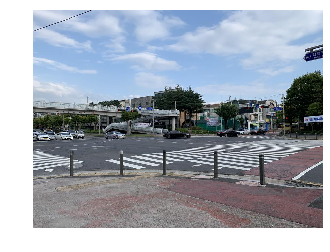

Retrieval top-5 result:
1068_gsv_3 1
1067_gsv_3 1
981_gsv_3 1
984_gsv_6 0
1156_gsv_6 0
1156_gsv_5 0
1068_gsv_2 1
1067_gsv_2 1
983_gsv_4 0
980_gsv_3 1


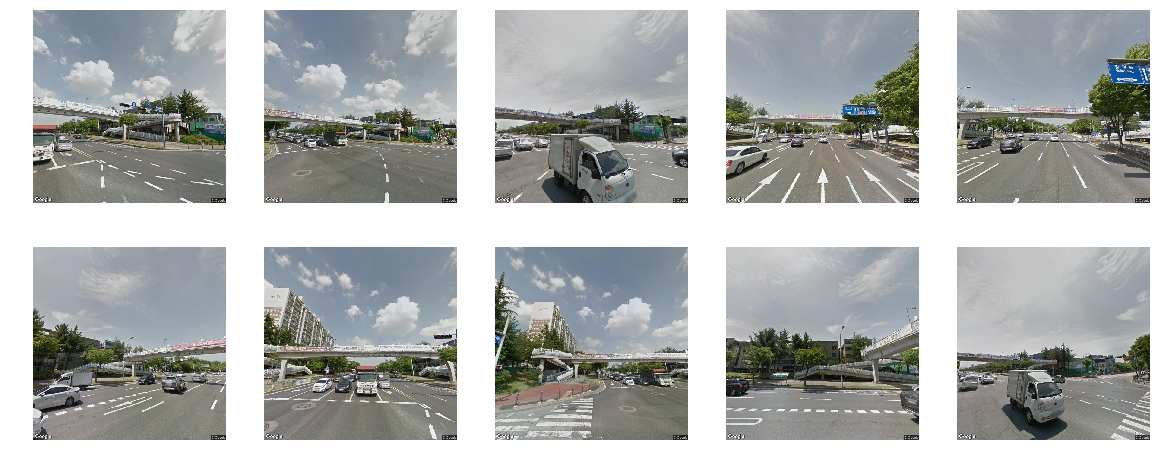

In [12]:
plt.subplot() 
query_name = "IMG_0415"
query_index = 0
top_ranks = 50
for query_index in range(len(queries)):
    if queries[query_index] == query_name:
        break
test_query = queries[query_index]
test_vector = query_vectors[query_index]
test_image = query_images[query_index]
rank_list = []
# plt.plot(test_vector)
# plt.show()
for vector, index in zip(database,indexes):
    rank_list.append((index, np.dot(vector, test_vector)))
rank_list.sort(key = lambda tup: tup[1], reverse=True)
predict = []
for i in range(top_ranks):
    predict.append(rank_list[i][0])
print("Query %s" % test_query)
plt.axis('off')
plt.imshow(test_image)
plt.show()
ref_file = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_query_60m.csv"
with open(ref_file) as f:
    contents = f.readlines()
lines = [x.strip('\n') for x in contents]
ref = dict()
for line in lines:
    tup = line.split(',')
    ref[tup[0]] = set(tup[1:])
print("Retrieval top-5 result:")
plt.figure(figsize=(20,8))
for i in range(10):
    if(predict[i][:-6] in ref[query_name]):
       print(predict[i],1)
    else:
       print(predict[i],0)
    im = img.imread(os.path.join(image_dir, predict[i] + '.jpg'))
    plt.subplot(2,5,i+1) 
    plt.axis('off')
    plt.imshow(im)
plt.show()

In [6]:
import ThesisToolkit
from scipy import spatial
from skimage import feature
from skimage import measure
from skimage import transform
featureIO = ThesisToolkit.FeaturesIOToolkit
database_features_dir = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_delf/"
query_locs, query_des = featureIO.DelfReadSingleImage(features_path = os.path.join(query_dir, query_name + '.delf'))
nums_features_q = len(query_des)
# Create query tree for this query
q_tree = spatial.cKDTree(query_des)
rerank_list = []
for im in predict:
    print(im)
    im_locs, im_des = featureIO.DelfReadSingleImage(features_path = os.path.join(database_features_dir, im + '.delf'))
    nums_features_im = len(im_des)
    _, indices = q_tree.query(im_des, distance_upper_bound = 0.8)
    location_to_use_im = np.array([
        im_locs[i]
        for i in range(min(nums_features_im, nums_features_q))
        if indices[i] != nums_features_q
    ])
    location_to_use_q = np.array([
        query_locs[indices[i]]
        for i in range(min(nums_features_im, nums_features_q))
        if indices[i] != nums_features_q
    ])
    _, inliers = measure.ransac((location_to_use_q, location_to_use_im),
                      transform.AffineTransform,
                      min_samples=3,
                      residual_threshold=20,
                      max_trials=1000)
    print('%s: Found %d inliers from %d loc' % (im, sum(inliers), len(location_to_use_im)))
    rerank_list.append((im, sum(inliers)))
rerank_list.sort(key = lambda tup: tup[1], reverse = True)

2664_gsv_7


/usr/local/lib/python3.5/dist-packages/skimage/transform/_geometric.py:683: RuntimeWarning: divide by zero encountered in true_divide
  H.flat[list(self._coeffs) + [8]] = - V[-1, :-1] / V[-1, -1]
/usr/local/lib/python3.5/dist-packages/skimage/transform/_geometric.py:687: RuntimeWarning: invalid value encountered in matmul
  H = np.linalg.inv(dst_matrix) @ H @ src_matrix
/usr/local/lib/python3.5/dist-packages/skimage/measure/fit.py:831: RuntimeWarning: invalid value encountered in less
  sample_model_inliers = sample_model_residuals < residual_threshold


2664_gsv_7: Found 19 inliers from 149 loc
2750_gsv_6
2750_gsv_6: Found 13 inliers from 104 loc
2922_gsv_5


/usr/local/lib/python3.5/dist-packages/skimage/transform/_geometric.py:683: RuntimeWarning: invalid value encountered in true_divide
  H.flat[list(self._coeffs) + [8]] = - V[-1, :-1] / V[-1, -1]


2922_gsv_5: Found 14 inliers from 97 loc
2662_gsv_1
2662_gsv_1: Found 17 inliers from 235 loc
3088_gsv_3
3088_gsv_3: Found 16 inliers from 157 loc
3253_gsv_6
3253_gsv_6: Found 13 inliers from 130 loc
1019_gsv_0
1019_gsv_0: Found 11 inliers from 125 loc
3094_gsv_5
3094_gsv_5: Found 13 inliers from 99 loc
1019_gsv_7
1019_gsv_7: Found 14 inliers from 135 loc
3088_gsv_2
3088_gsv_2: Found 14 inliers from 163 loc
968_gsv_1
968_gsv_1: Found 13 inliers from 117 loc
616_gsv_5
616_gsv_5: Found 23 inliers from 175 loc
73_gsv_2
73_gsv_2: Found 12 inliers from 139 loc
2750_gsv_7
2750_gsv_7: Found 13 inliers from 108 loc
972_gsv_0
972_gsv_0: Found 10 inliers from 88 loc
1019_gsv_1
1019_gsv_1: Found 13 inliers from 137 loc
2836_gsv_5
2836_gsv_5: Found 16 inliers from 128 loc
2835_gsv_5
2835_gsv_5: Found 15 inliers from 117 loc
2836_gsv_6
2836_gsv_6: Found 13 inliers from 148 loc
417_gsv_6
417_gsv_6: Found 21 inliers from 124 loc
2787_gsv_2
2787_gsv_2: Found 11 inliers from 81 loc
894_gsv_6
894_gsv_6:

Query IMG_0398


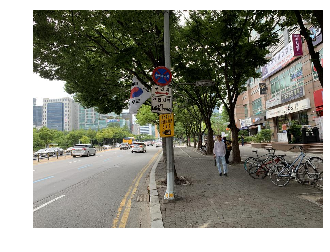

Retrieval top-5 result:
('2922_gsv_4', 32) 1
('1279_gsv_0', 28) 0
('2836_gsv_4', 28) 1
('616_gsv_5', 23) 0
('417_gsv_6', 21) 0
('3438_gsv_4', 21) 0
('2664_gsv_7', 19) 1
('417_gsv_5', 18) 0
('2662_gsv_1', 17) 0
('101_gsv_5', 17) 0


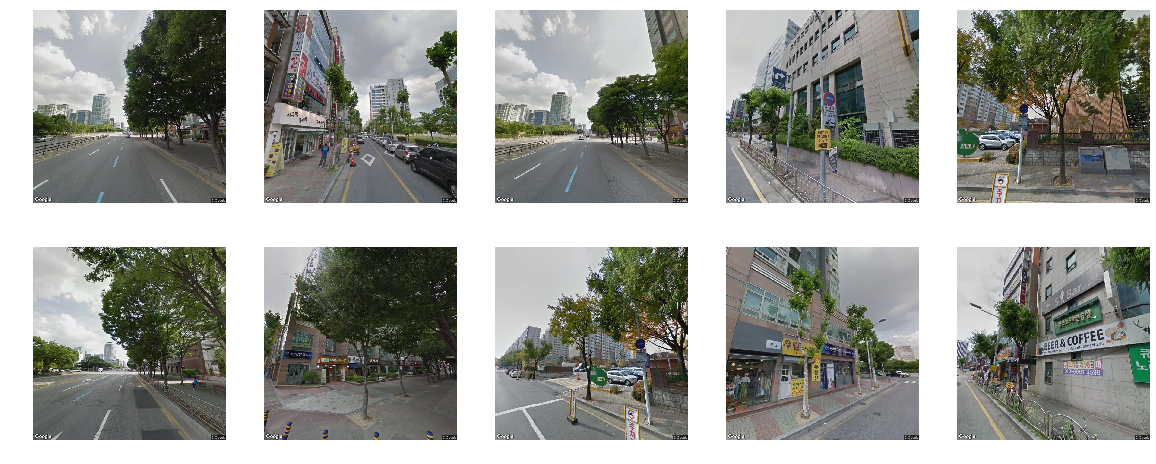

In [7]:
print("Query %s" % test_query)
plt.axis('off')
plt.imshow(test_image)
plt.show()
print("Retrieval top-5 result:")

ref_file = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_query_60m.csv"
with open(ref_file) as f:
    contents = f.readlines()
lines = [x.strip('\n') for x in contents]
ref = dict()
for line in lines:
    tup = line.split(',')
    ref[tup[0]] = set(tup[1:])

plt.figure(figsize=(20,8))
for i in range(10):
    if (rerank_list[i][0][:-6]) in ref[query_name]:
        print(rerank_list[i],1)
    else: 
        print(rerank_list[i],0)
    im = img.imread(os.path.join(image_dir, rerank_list[i][0] + '.jpg'))
    plt.subplot(2,5,i+1) 
    plt.axis('off')
    plt.imshow(im)
plt.show()

In [8]:
predicts = []
top_ranks = 50
for query,image,query_vector in zip(queries, query_images, query_vectors):
    rank_list = []
    predict = []
    predict.append(query)
    for vector, index in zip(database,indexes):
        rank_list.append((index, np.dot(vector, query_vector)))
    rank_list.sort(key = lambda tup: tup[1], reverse=True)
    for i in range(top_ranks):
        predict.append(rank_list[i][0])
    predicts.append(predict)
print(predicts)

[['IMG_0420', '1878_gsv_2', '2051_gsv_1', '1877_gsv_2', '2310_gsv_4', '1963_gsv_2', '1791_gsv_2', '2309_gsv_4', '2137_gsv_2', '2310_gsv_2', '1879_gsv_2', '2137_gsv_1', '2051_gsv_2', '3350_gsv_4', '1967_gsv_0', '3263_gsv_4', '1791_gsv_1', '1877_gsv_1', '1878_gsv_1', '2050_gsv_1', '1882_gsv_4', '2052_gsv_4', '1963_gsv_1', '2050_gsv_2', '2224_gsv_4', '3350_gsv_3', '447_gsv_7', '1792_gsv_2', '3093_gsv_0', '2310_gsv_5', '3002_gsv_0', '2222_gsv_3', '3092_gsv_0', '1879_gsv_1', '2051_gsv_4', '1969_gsv_4', '1967_gsv_7', '2309_gsv_5', '2308_gsv_3', '1877_gsv_3', '1962_gsv_1', '2310_gsv_3', '3087_gsv_0', '3174_gsv_0', '1877_gsv_4', '355_gsv_3', '2048_gsv_1', '2137_gsv_4', '162_gsv_4', '3176_gsv_3', '361_gsv_7'], ['IMG_0431', '65_gsv_4', '64_gsv_4', '1955_gsv_4', '1954_gsv_4', '1609_gsv_4', '62_gsv_4', '63_gsv_4', '234_gsv_4', '66_gsv_4', '664_gsv_3', '66_gsv_3', '1957_gsv_4', '406_gsv_3', '3202_gsv_3', '2005_gsv_4', '3203_gsv_3', '4077_gsv_3', '587_gsv_5', '64_gsv_3', '234_gsv_3', '2042_gsv_4', '

In [9]:
ref_file = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_query_50m.csv"
with open(ref_file) as f:
    contents = f.readlines()
lines = [x.strip('\n') for x in contents]
ref = dict()
for line in lines:
    tup = line.split(',')
    ref[tup[0]] = set(tup[1:])
results = []
images = []
for predict in predicts:
    result = []
    query = predict[0]
#     result.append(query)
    rank_list = predict[1:]
    first_correct = 0
    for item in rank_list:
        if item[:-6] in ref[query]:
            result.append(1)
        else:
            result.append(0)
    results.append(np.array(result))

for query,result in zip(queries,results):
    print(query, result)
# Recall calculation:
recall_results = []
for result in results:
    recall_result = []
    first_correct = 0
    for item in result:
        if item == 1:
            for i in range(first_correct, len(result)):
                recall_result.append(1)
            break
        else:
            recall_result.append(0)
            first_correct += 1
    recall_results.append(np.array(recall_result))

top_retrieval = 20
recall = np.array([0]*top_retrieval)
for recall_result in recall_results:
    recall += recall_result[:top_retrieval]
recall = recall/float(len(queries))
print(recall)

# Precision calculation
precision = []
precision_rank = np.array([0]*top_retrieval)
for result in results:
    precision_rank += result[:top_retrieval]
s = 0
for i in range(0,len(precision_rank)):
    s += precision_rank[i]
    precision.append(s/((i+1)*len(queries)))
print(np.array(precision))

IMG_0420 [1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 0 1 0 1 1 0 0 0]
IMG_0431 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
IMG_0415 [1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0]
IMG_0419 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0]
IMG_0398 [1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0]
IMG_0413 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 1 0]
IMG_0405 [0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 1 1 0 1 0 1 0 0 0]
IMG_0394 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1]
IMG_0421 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0

In [10]:
# # Spartial geometric verification to re-reank the result
# # Load all database delf features:
# query_images, ir._ReadDelfFeatures()
# # OpenCV RANSAC
# for predict in zip(queries,predicts):
#     re_rank_list = []
#     query = predict[0]
#     rank_list = predict[1:]
#     for im in rank_list:
        

In [11]:
import ThesisToolkit
from scipy import spatial
from skimage import feature
from skimage import measure
from skimage import transform
featureIO = ThesisToolkit.FeaturesIOToolkit

In [12]:
# test_images, test_locations, test_features = test.DelfReadDirectory(directory = query_dir)
database_features_dir = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_delf/"
gv_predicts = []
for predict in predicts:
    query = predict[0]
    query_locs, query_des = featureIO.DelfReadSingleImage(features_path = os.path.join(query_dir, query + '.delf'))
    nums_features_q = len(query_des)
    # Create query tree for this query
    q_tree = spatial.cKDTree(query_des)
    rank_list = predict[1:]
    rerank_list = []
    gv_list = []
    gv_list.append(query)
    for im in rank_list:
        im_locs, im_des = featureIO.DelfReadSingleImage(features_path = os.path.join(database_features_dir, im + '.delf'))
        nums_features_im = len(im_des)
        _, indices = q_tree.query(im_des, distance_upper_bound = 0.8)
        location_to_use_im = np.array([
            im_locs[i]
            for i in range(min(nums_features_im, nums_features_q))
            if indices[i] != n ums_features_q
        ])
        location_to_use_q = np.array([
            query_locs[indices[i]]
            for i in range(min(nums_features_im, nums_features_q))
            if indices[i] != nums_features_q
        ])
        _, inliers = measure.ransac((location_to_use_q, location_to_use_im),
                          transform.AffineTransform,
                          min_samples=3,
                          residual_threshold=20,
                          max_trials=1000)
        print('%s: Found %d inliers from %d loc' % (im, sum(inliers), len(location_to_use_im)))
        rerank_list.append((im, sum(inliers)))
    rerank_list.sort(key = lambda tup: tup[1], reverse = True)
#     for im in rerank_list:
#         gv_list.append(im[0])
#     print(gv_list)
    gv_list.append(im[0][0])
    gv_predicts.append(gv_list)

SyntaxError: invalid syntax (<ipython-input-12-31746fc69625>, line 21)

In [ ]:
ref_file = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_query_60m.csv"
with open(ref_file) as f:
    contents = f.readlines()
lines = [x.strip('\n') for x in contents]
ref = dict()
for line in lines:
    tup = line.split(',')
    ref[tup[0]] = set(tup[1:])
gv_results = []
for predict in gv_predicts:
    result = []
    query = predict[0]
#     result.append(query)
    rank_list = predict[1:]
    first_correct = 0
    for item in rank_list:
        if item[:-6] in ref[query]:
            result.append(1)
        else:
            result.append(0)
    gv_results.append(np.array(result))

for query,result in zip(queries,gv_results):
    print(query, result)

top_retrieval = 20
# Recall calculation:
recall_gv_results = []
for result in gv_results:
    recall_gv_result = []
    first_correct = 0
    for item in result:
        if item == 1:
            for i in range(first_correct, len(result)):
                recall_gv_result.append(1)
            break
        else:
            recall_gv_result.append(0)
            first_correct += 1
    recall_gv_results.append(np.array(recall_gv_result))

recall_gv = np.array([0]*top_retrieval)
for recall_gv_result in recall_gv_results:
    recall_gv += recall_gv_result[:top_retrieval]
recall_gv = recall_gv/float(len(queries))
print(recall_gv)

# Precision calculation
precision_gv = []
precision_gv_rank = np.array([0]*top_retrieval)
for result in gv_results:
    precision_gv_rank += result[:top_retrieval]
s = 0
for i in range(0,len(precision_gv_rank)):
    s += precision_gv_rank[i]
    precision_gv.append(s/((i+1)*len(queries)))
print(np.array(precision_gv))